In [1]:
import math
import xarray as xr
import cartopy.crs as ccrs
import matplotlib as mpl
from matplotlib import pyplot as plt 
import matplotlib.pylab as plt
import matplotlib.path as mpath
from matplotlib.pyplot import figure
import numpy as np
import cartopy.feature as cfeature
from matplotlib.cm import get_cmap
import pyproj
import utm
import pandas as pd 
import traceback 
from pathlib import Path  
import os  
import numpy.ma as ma
import netCDF4 as nc
from netCDF4 import Dataset
import glob
import datetime as dt
import metpy.calc as mpcalc
from metpy.units import units
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots.declarative import (BarbPlot, ContourPlot, FilledContourPlot, MapPanel,
                                     PanelContainer, PlotObs)
from netCDF4 import date2num,num2date
#from scipy.ndimage import gaussian_filter
import wrf
from wrf import (getvar, interplevel, to_np, latlon_coords, get_cartopy,
                 cartopy_xlim, cartopy_ylim)
from wrf import getvar, interplevel, to_np, get_basemap, latlon_coords

In [6]:
#Dimensions:      (Time: 1, num_metgrid_levels: 32, south_north: 120, west_east: 153, num_st_layers: 4, num_sm_layers: 4,
#                  south_north_stag: 121, west_east_stag: 154, z-dimension0012: 12, z-dimension0016: 16, z-dimension0021: 21)
#Dimensions without coordinates: Time, num_metgrid_levels, south_north, west_east, num_st_layers, num_sm_layers,
#                                south_north_stag, west_east_stag,z-dimension0012, z-dimension0016,z-dimension0021

#XLONG_U      (Time, south_north, west_east_stag) float32 ...
#XLAT_U       (Time, south_north, west_east_stag) float32 ...
#XLONG_V      (Time, south_north_stag, west_east) float32 ...
#XLAT_V       (Time, south_north_stag, west_east) float32 ...
#XLONG_M      (Time, south_north, west_east) float32 ...
#XLAT_M       (Time, south_north, west_east) float32 ...

#WEST-EAST_GRID_DIMENSION:        154
#SOUTH-NORTH_GRID_DIMENSION:      121
#BOTTOM-TOP_GRID_DIMENSION:       32

#'VV': <xarray.Variable (Time: 1, num_metgrid_levels: 32, south_north_stag: 121, west_east: 153)
#'UU': <xarray.Variable (Time: 1, num_metgrid_levels: 32, south_north: 120, west_east_stag: 154)
#'SKINTEMP': <xarray.Variable (Time: 1, south_north: 120, west_east: 153)>

d01 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunSST/wrfinput_d01')
d02 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunSST/wrfinput_d02')
d03 = xr.open_dataset('/Users/Anna/Desktop/WRF/shortRunSST/wrfinput_d03')

#print(d01.variables)
#print(d01.UOCE.shape)
#print(d01.VOCE.shape)
#print(d01.SST.shape)
#print('n', d02.variables)
#print('\n', d02.UOCE.shape)
#print(d02.VOCE.shape)
#print(d02.SST.shape)
#print('n', d03.variables)
#print('\n', d03.UOCE.shape)
#print(d03.VOCE.shape)
#print(d03.SST.shape)

old_d01_SST = d01.SST.values
old_d01_UOCE = d01.UOCE.values
old_d01_VOCE = d01.VOCE.values
XLAT1 = d01.XLAT.values
XLON1 = d01.XLONG.values

old_d02_SST = d02.SST.values
old_d02_UOCE = d02.UOCE.values
old_d02_VOCE = d02.VOCE.values
XLAT2 = d02.XLAT.values
XLON2 = d02.XLONG.values

old_d03_SST = d03.SST.values
old_d03_UOCE = d03.UOCE.values
old_d03_VOCE = d03.VOCE.values
XLAT3 = d03.XLAT.values
XLON3 = d03.XLONG.values

print('XLON1: ', XLON1.shape, 'XLAT1: ', XLAT1.shape)
print('XLON2: ', XLON2.shape, 'XLAT2: ', XLAT2.shape)
print('XLON3: ', XLON3.shape, 'XLAT3: ', XLAT3.shape)
print ('d01_UOCE: ',old_d01_UOCE.shape, ' d01_VOCE: ',  old_d01_VOCE.shape, ' d01_SST: ', d01.SST.shape)
print ('d02_UOCE: ',old_d02_UOCE.shape, ' d02_VOCE: ',  old_d02_VOCE.shape, ' d02_SST: ', d02.SST.shape)
print ('d03_UOCE: ',old_d03_UOCE.shape, ' d03_VOCE: ',  old_d03_VOCE.shape, ' d03_SST: ', d03.SST.shape)

XLON1:  (1, 495, 662) XLAT1:  (1, 495, 662)
XLON2:  (1, 486, 651) XLAT2:  (1, 486, 651)
XLON3:  (1, 474, 639) XLAT3:  (1, 474, 639)
d01_UOCE:  (1, 495, 662)  d01_VOCE:  (1, 495, 662)  d01_SST:  (1, 495, 662)
d02_UOCE:  (1, 486, 651)  d02_VOCE:  (1, 486, 651)  d02_SST:  (1, 486, 651)
d03_UOCE:  (1, 474, 639)  d03_VOCE:  (1, 474, 639)  d03_SST:  (1, 474, 639)


Text(0.5, 1.0, 'UOCE 3')

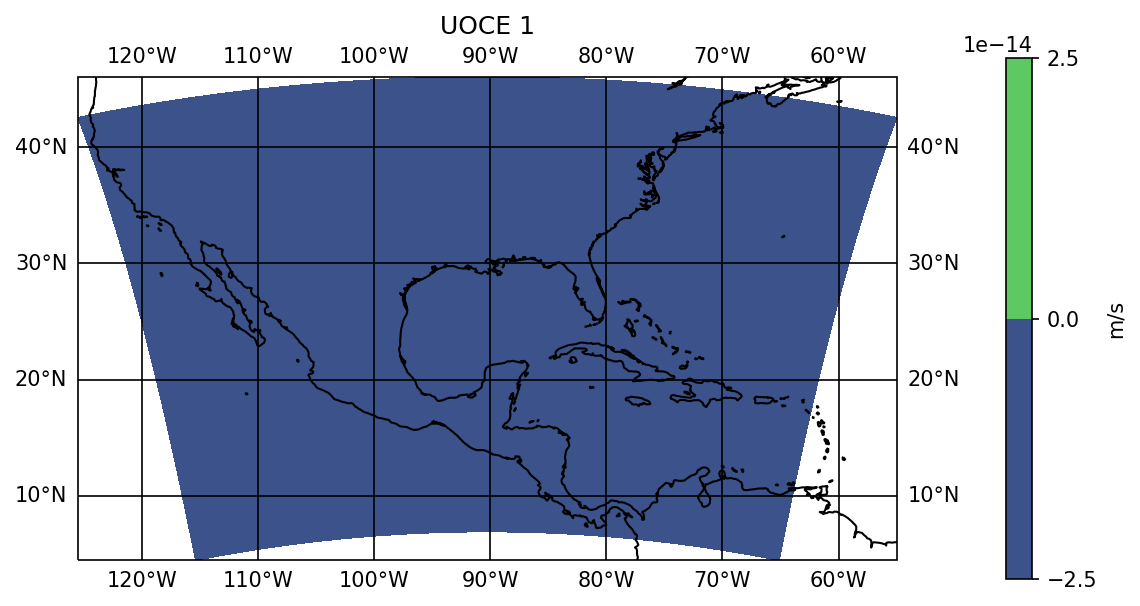

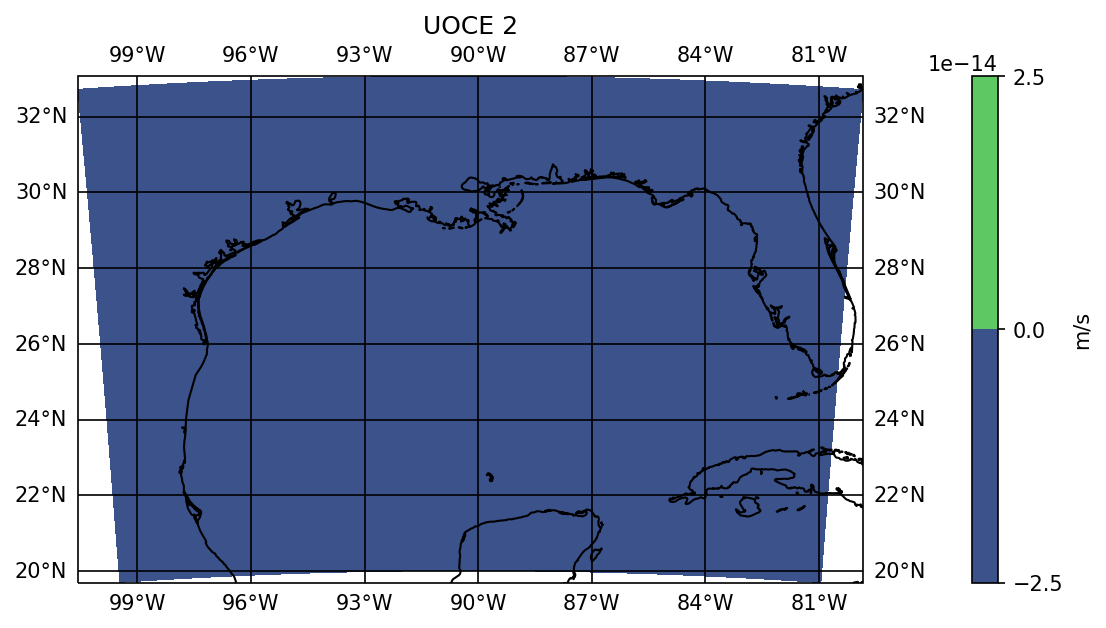

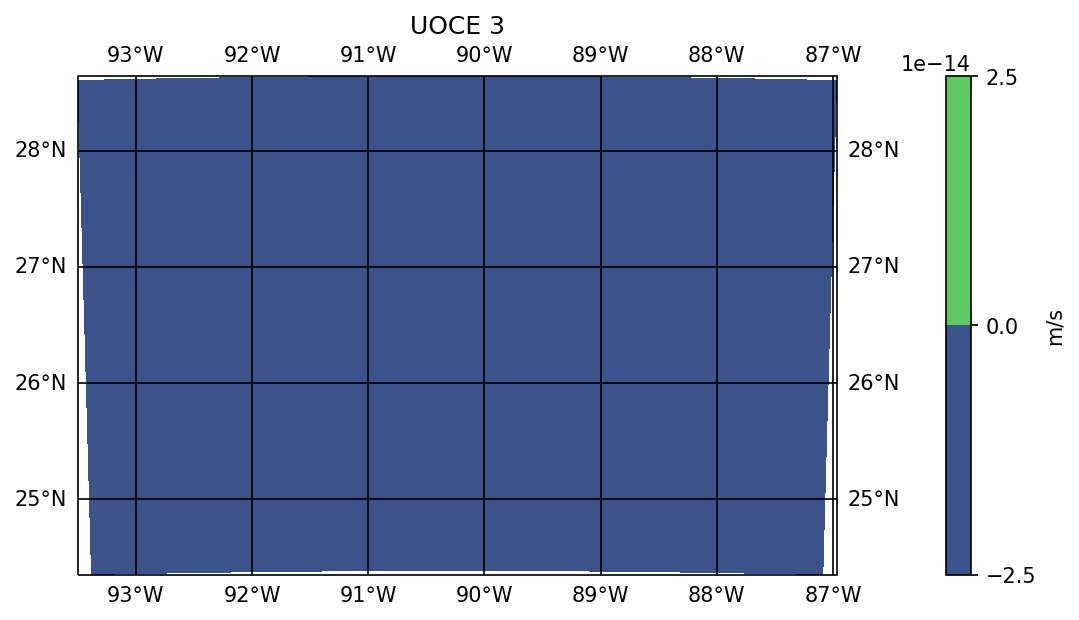

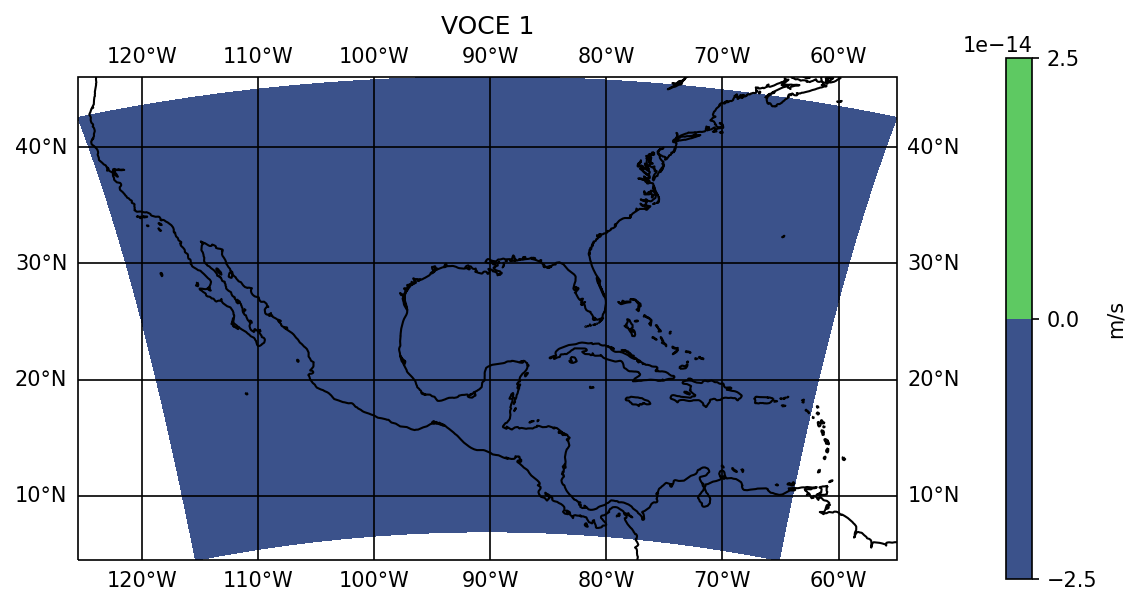

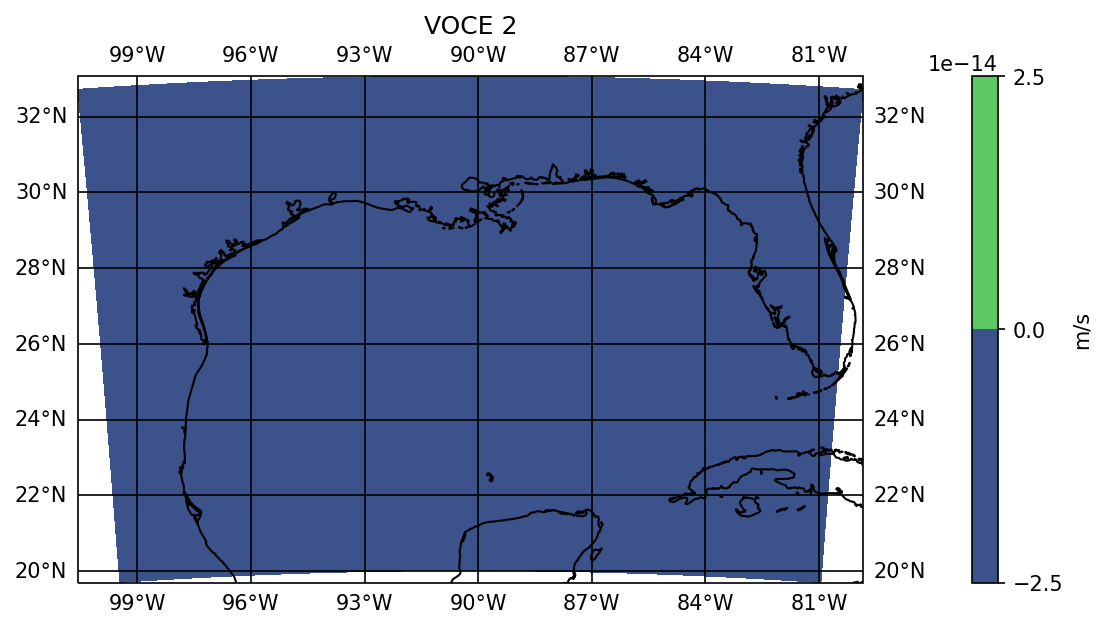

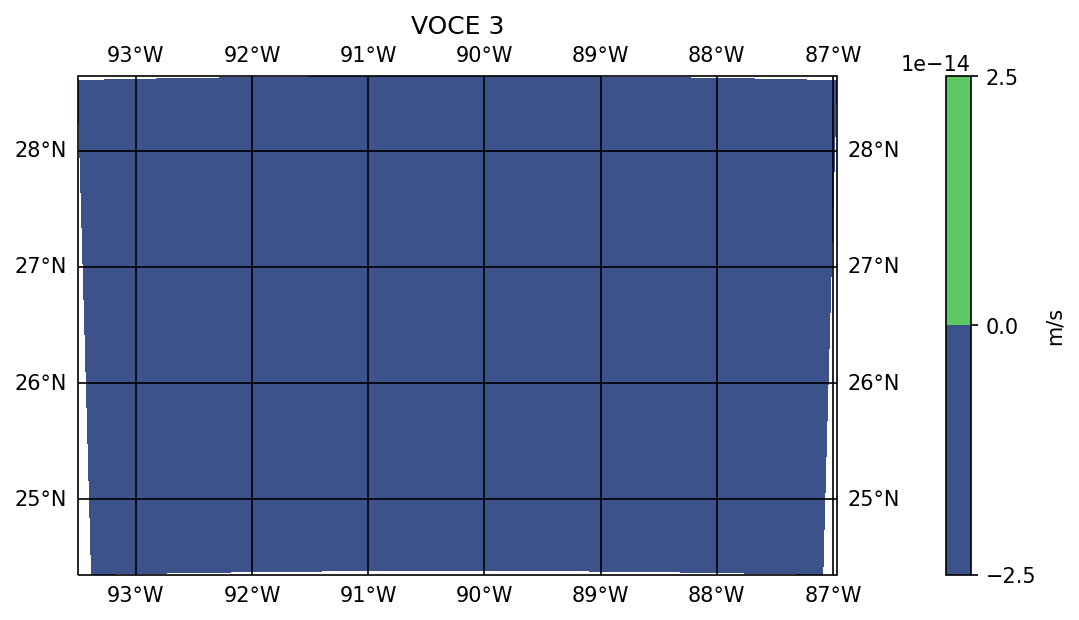

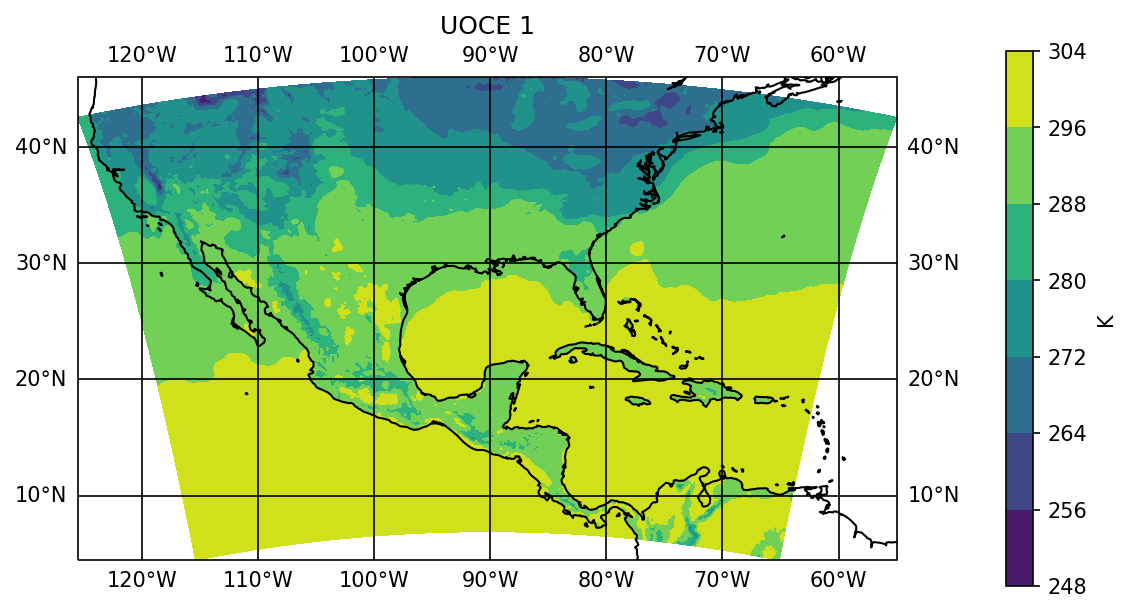

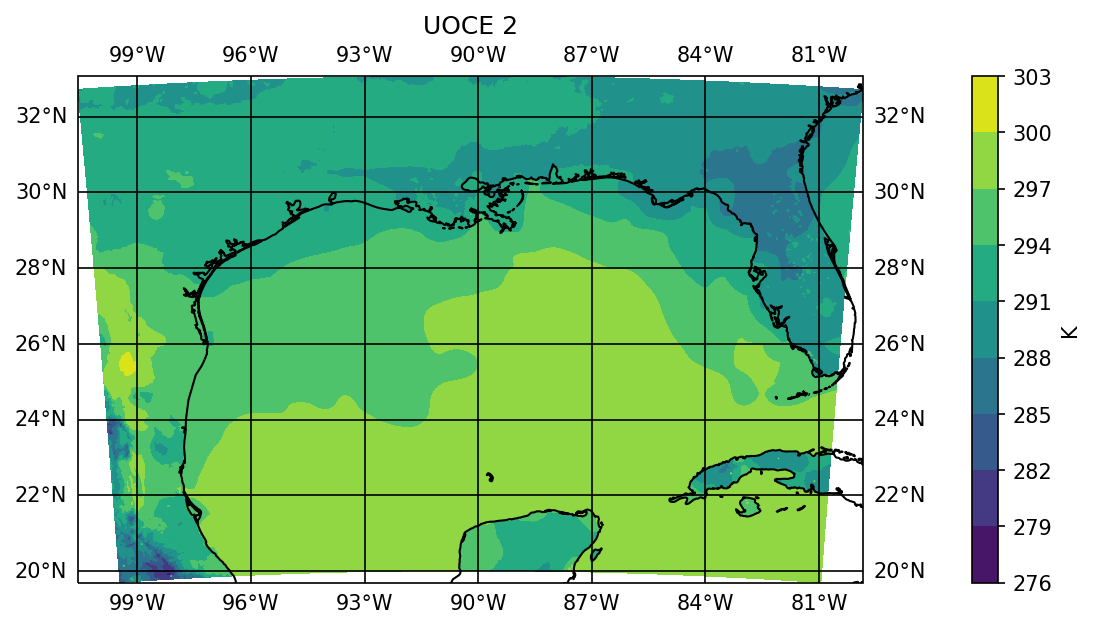

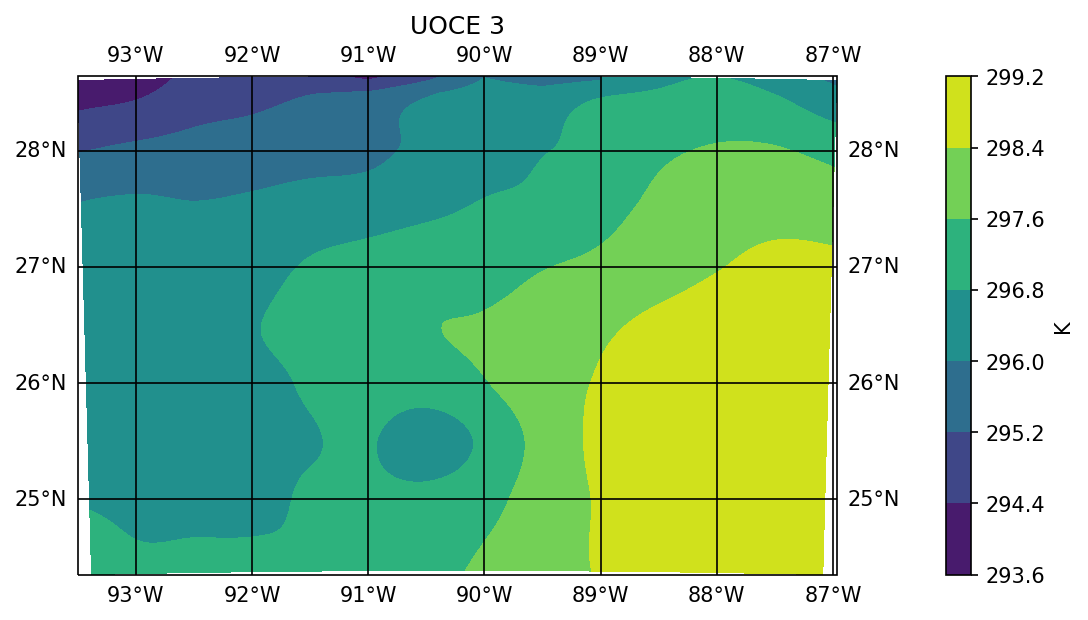

In [10]:
#Plot  UOCE_d01
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON1[0,:,:], XLAT1[0,:,:], old_d01_UOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE 1')


#Plot UOCE_d02
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON2[0,:,:], XLAT2[0,:,:], old_d02_UOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE 2')


#Plot UOCE_d03
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON3[0,:,:], XLAT3[0,:,:], old_d03_UOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE 3')


#Plot  UOCE_d01
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON1[0,:,:], XLAT1[0,:,:], old_d01_VOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('VOCE 1')


#Plot UOCE_d02
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON2[0,:,:], XLAT2[0,:,:], old_d02_VOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('VOCE 2')


#Plot UOCE_d03
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON3[0,:,:], XLAT3[0,:,:], old_d03_VOCE[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('VOCE 3')

#Plot  UOCE_d01
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON1[0,:,:], XLAT1[0,:,:], old_d01_SST[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE 1')


#Plot UOCE_d02
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON2[0,:,:], XLAT2[0,:,:], old_d02_SST[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE 2')


#Plot UOCE_d03
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(XLON3[0,:,:], XLAT3[0,:,:], old_d03_SST[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('UOCE 3')


In [15]:
#ds_wrfin1_new = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/WRF_HYCOM_SST/wrfinput_d01')
#ds_wrfin1 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/wrfinput_d01_COPY')

#ds_wrfin2_new = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/WRF_HYCOM_SST/wrfinput_d02')
#ds_wrfin2 = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/wrfinput_d02_COPY')

#wrfin2_test = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/WRF_TEST/wrfinput_d03')
#wrfout = xr.open_dataset('/Users/Anna/Desktop/MSMET/Thesis/WRF_TEST/wrfout_d03_2018-03-25_00_00_00')


#stream24 = xr.open_dataset('stream24')

In [14]:
#print(ds_wrfin1.keys)
#print('\n\n', ds_wrfin1.variables)

In [ ]:
'''
SST': <xarray.Variable (Time: 1, south_north: 89, west_east: 99)>
[8811 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE TEMPERATURE
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME})

'UOCE': <xarray.Variable (Time: 1, south_north: 89, west_east: 99)>
[8811 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE ZONAL CURRENTS
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME, 
    'VOCE': <xarray.Variable (Time: 1, south_north: 89, west_east: 99)>
[8811 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE MERIDIONAL CURRENTS
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME,
    '''

In [ ]:
'''
'U': <xarray.Variable (Time: 1, bottom_top: 49, south_north: 89, west_east_stag: 100)>
[436100 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  x-wind component
    units:        m s-1
    stagger:      X
    coordinates:  XLONG_U XLAT_U XTIME, 
'V': <xarray.Variable (Time: 1, bottom_top: 49, south_north_stag: 90, west_east: 99)>
[436590 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XYZ
    description:  y-wind component
    units:        m s-1
    stagger:      Y
    coordinates:  XLONG_V XLAT_V XTIME, 
    
    XLAT_U                (Time, south_north, west_east_stag) float32 ...
    XLONG_U               (Time, south_north, west_east_stag) float32 ...
    XLAT_V                (Time, south_north_stag, west_east) float32 ...
    XLONG_V               (Time, south_north_stag, west_east) float32 ...
'''

In [ ]:
test_uwind = wrfin2_test.U.values
test_vwind = wrfin2_test.V.values
test_vlat = wrfin2_test.XLAT_V.values
test_vlon = wrfin2_test.XLONG_V.values
test_ulat = wrfin2_test.XLAT_U.values
test_ulon = wrfin2_test.XLONG_U.values

print('uwind shape: ', test_uwind.shape)
print('vwind shape: ', test_vwind.shape)
print('\nulat shape: ', test_ulat.shape)
print('ulon shape: ', test_ulon.shape)
print('vlat shape: ', test_vlat.shape)
print('vlon shape: ', test_vlon.shape)

print('\nv lat: ', test_vlat)
print('\nv lon: ', test_vlon)

test_ucurrent = wrfin2_test.UOCE.values
test_vcurrent = wrfin2_test.VOCE.values
test_sst = wrfin2_test.SST.values
test_lat = wrfin2_test.XLAT.values  
test_lon = wrfin2_test.XLONG.values 

#WRF d02
print('\nu current shape: ', test_ucurrent.shape)
print('v current shape: ', test_vcurrent.shape)
print('SST shape: ', test_sst.shape)
print('lat shape: ', test_lat.shape)
print('lon shape: ',test_lon.shape)
print('max lat: ',np.max(test_lat))
print('min lat: ',np.min(test_lat))
print('max lon: ',np.max(test_lon))
print('min lon: ',np.min(test_lon))

print('\nlat values: ', test_lat)
print('lon values: ', test_lon)

In [ ]:
#Plot SST
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(test_lon[0,:,:], test_lat[0,:,:], test_sst[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('TEST SST')

#Plot u current
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(test_lon[0,:,:], test_lat[0,:,:], test_ucurrent[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('test u current')

#Plot v current
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(test_lon[0,:,:], test_lat[0,:,:], test_vcurrent[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('test v current')

#Plot u wind
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(test_ulon[0,:,:], test_ulat[0,:,:], test_uwind[0, 0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('test u wind')

#Plot v wind
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(test_vlon[0,:,:], test_vlat[0,:,:], test_vwind[0, 0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('test v wind')

In [ ]:

wrfin_uwind = ds_wrfin1.U.values
wrfin_vwind = ds_wrfin1.V.values
wrfin_vlat = ds_wrfin1.XLAT_V.values
wrfin_vlon = ds_wrfin1.XLONG_V.values
wrfin_ulat = ds_wrfin1.XLAT_U.values
wrfin_ulon = ds_wrfin1.XLONG_U.values

#wrfin_uwind_new = ds_wrfin1_new.U.values
#wrfin_vwind_new = ds_wrfin1_new.V.values
#wrfin_vlat_new = ds_wrfin1_new.XLAT_V.values
#wrfin_vlon_new = ds_wrfin1_new.XLONG_V.values
#wrfin_ulat_new = ds_wrfin1_new.XLAT_U.values
#wrfin_ulon_new = ds_wrfin1_new.XLONG_U.values

wrfin_uwind2 = ds_wrfin2.U.values
wrfin_vwind2 = ds_wrfin2.V.values
wrfin_vlat2 = ds_wrfin2.XLAT_V.values
wrfin_vlon2 = ds_wrfin2.XLONG_V.values
wrfin_ulat2 = ds_wrfin2.XLAT_U.values
wrfin_ulon2 = ds_wrfin2.XLONG_U.values

#wrfin_uwind_2new = ds_wrfin2_new.U.values
#wrfin_vwind_2new = ds_wrfin2_new.V.values
#wrfin_vlat_2new = ds_wrfin2_new.XLAT_V.values
#wrfin_vlon_2new = ds_wrfin2_new.XLONG_V.values
#wrfin_ulat_2new = ds_wrfin2_new.XLAT_U.values
#wrfin_ulon_2new = ds_wrfin2_new.XLONG_U.values

print('uwind shape: ', wrfin_uwind.shape)
print('vwind shape: ', wrfin_vwind.shape)
print('\nulat shape: ', wrfin_ulat.shape)
print('ulon shape: ', wrfin_ulon.shape)
print('vlat shape: ', wrfin_vlat.shape)
print('vlon shape: ', wrfin_vlon.shape)

print('\nv lat: ', wrfin_vlat)
print('horizontal lat diff: ', 24.142975-24.142792)
print('vertical lat diff: ', 24.15178-24.142792)
print('\nv lon: ', wrfin_vlon)
print('horizontal lon diff: ', -93.31012--93.31995)
print('vertical lon diff: ', -93.3201--93.31995)

print('\nuwind shape: ', wrfin_uwind2.shape)
print('vwind shape: ', wrfin_vwind2.shape)
print('\nulat shape: ', wrfin_ulat2.shape)
print('ulon shape: ', wrfin_ulon2.shape)
print('vlat shape: ', wrfin_vlat2.shape)
print('vlon shape: ', wrfin_vlon2.shape)

print('\nv lat: ', wrfin_vlat2)
print('horizontal lat diff: ', 25.029655-25.029686)
print('vertical lat diff: ', 25.029655-25.032639 )
print('\nv lon: ', wrfin_vlon2)
print('horizontal lon diff: ', -92.30057--93.31012)
print('vertical lon diff: ', -92.30057--92.3006)


In [ ]:
'''
#Plot u wind
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrfin_ulon[0,:,:], wrfin_ulat[0,:,:], wrfin_uwind[0, 0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('u wind')

#Plot v wind
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrfin_vlon[0,:,:], wrfin_vlat[0,:,:], wrfin_vwind[0, 0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('v wind')
'''

In [ ]:
'''
'SST': <xarray.Variable (Time: 1, south_north: 89, west_east: 99)>
[8811 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE TEMPERATURE
    units:        K
    stagger:      
    coordinates:  XLONG XLAT XTIME})

'UOCE': <xarray.Variable (Time: 1, south_north: 89, west_east: 99)>
[8811 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE ZONAL CURRENTS
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME, 
    'VOCE': <xarray.Variable (Time: 1, south_north: 89, west_east: 99)>
[8811 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  SEA SURFACE MERIDIONAL CURRENTS
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME,
'''
    
wrfin1_ucurrent = ds_wrfin1.UOCE.values
wrfin1_vcurrent = ds_wrfin1.VOCE.values
wrfin1_sst = ds_wrfin1.SST.values
wrf1_lat = ds_wrfin1.XLAT.values  
wrf1_lon = ds_wrfin1.XLONG.values 

wrfin1_ucurrent_new = ds_wrfin1_new.UOCE.values
wrfin1_vcurrent_new = ds_wrfin1_new.VOCE.values
wrfin1_sst_new = ds_wrfin1_new.SST.values
wrf1_lat_new = ds_wrfin1_new.XLAT.values  
wrf1_lon_new = ds_wrfin1_new.XLONG.values 

wrfin2_ucurrent = ds_wrfin1.UOCE.values
wrfin2_vcurrent = ds_wrfin1.VOCE.values
wrfin2_sst = ds_wrfin1.SST.values
wrf2_lat = ds_wrfin1.XLAT.values  
wrf2_lon = ds_wrfin1.XLONG.values 

wrfin2_ucurrent_new = ds_wrfin2_new.UOCE.values
wrfin2_vcurrent_new = ds_wrfin2_new.VOCE.values
wrfin2_sst_new = ds_wrfin2_new.SST.values
wrf2_lat_new = ds_wrfin2_new.XLAT.values  
wrf2_lon_new = ds_wrfin2_new.XLONG.values 

#WRF d01
print('u current shape: ', wrfin1_ucurrent.shape)
print('v current shape: ', wrfin1_vcurrent.shape)
print('SST shape: ', wrfin1_sst.shape)
print('lat shape: ', wrf1_lat.shape)
print('lon shape: ',wrf1_lon.shape)

print('max lat: ',np.max(wrf1_lat))
print('min lat: ',np.min(wrf1_lat))
print('max lon: ',np.max(wrf1_lon))
print('min lon: ',np.min(wrf1_lon))

print('\nlat values: ', wrf1_lat)
print('lon values: ', wrf1_lon)

print('\n(right-left) lat diff: ', 24.147476 - 24.147293)
print('(right-left) lon diff: ', 24.156273 - 24.147293)
print('\n (lower-upper) lat diff: ', -93.31021 - -93.32004)
print('(lower-upper) lon diff: ', -93.32025 - -93.32004)

#WRF d02
print('\nu current shape: ', wrfin2_ucurrent.shape)
print('v current shape: ', wrfin2_vcurrent.shape)
print('SST shape: ', wrfin2_sst.shape)
print('lat shape: ', wrf2_lat.shape)
print('lon shape: ',wrf2_lon.shape)
print('max lat: ',np.max(wrf2_lat))
print('min lat: ',np.min(wrf2_lat))
print('max lon: ',np.max(wrf2_lon))
print('min lon: ',np.min(wrf2_lon))

print('\nlat values: ', wrf2_lat)
print('lon values: ', wrf2_lon)

print('\n(right-left) lat diff: ', 24.147476 - 24.147293)
print('(right-left) lon diff: ', 24.156273 - 24.147293)
print('\n (lower-upper) lat diff: ', -93.31021 - -93.32004)
print('(lower-upper) lon diff: ', -93.32025 - -93.32004)

'''
[1 values with dtype=|S19], 'XLAT': <xarray.Variable (Time: 1, south_north: 508, west_east: 520)>
[264160 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LATITUDE, SOUTH IS NEGATIVE
    units:        degree_north
    stagger:      , 'XLONG': <xarray.Variable (Time: 1, south_north: 508, west_east: 520)>
[264160 values with dtype=float32]
Attributes:
    FieldType:    104
    MemoryOrder:  XY 
    description:  LONGITUDE, WEST IS NEGATIVE
    units:        degree_east
'''

In [ ]:
#Plot SST
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrf1_lon[0,:,:], wrf1_lat[0,:,:], wrfin1_sst[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('OLD SST')

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrf1_lon_new[0,:,:], wrf1_lat_new[0,:,:], wrfin1_sst_new[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('NEW SST')


mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrf2_lon[0,:,:], wrf2_lat[0,:,:], wrfin2_sst[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('OLD SST 2')

mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrf2_lon_new[0,:,:], wrf2_lat_new[0,:,:], wrfin2_sst_new[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'K')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('NEW SST 2')


In [ ]:
'''
#Plot u current
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrf1_lon[0,:,:], wrf1_lat[0,:,:], wrfin1_ucurrent[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('u current')

#Plot v current
mapcrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(8, 4), dpi=150)
ax = fig.add_subplot(111, projection=mapcrs)
ax.coastlines()
cs = ax.contourf(wrf1_lon[0,:,:], wrf1_lat[0,:,:], wrfin1_vcurrent[0,:,:])
PCM=ax.get_children()[2]
plt.colorbar(cs, ax=ax, pad=0.1, label = 'm/s')
gl = ax.gridlines(draw_labels=True, dms=True, x_inline=False, y_inline=False, color = 'black')
plt.tight_layout()
gl.top_labels = False
gl.ylabels_right = False
plt.title('v current')
'''